In [ ]:
import pandas as pd
import numpy as np

import platform 
from matplotlib import font_manager, rc
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path="c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown System... sorry~~~~')

In [ ]:
wanted_de = pd.read_csv("./Data/wanted_de.csv")
wanted_da = pd.read_csv("./Data/wanted_da.csv")
wanted_ds = pd.read_csv("./Data/wanted_ds.csv")

In [ ]:
from konlpy.tag import Hannanum
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from wordcloud import STOPWORDS
import re
from konlpy.tag import Okt

# DE 우대사항

In [ ]:
wanted_de_df = wanted_de.copy()
wanted_de_kor = wanted_de['우대사항'].str.replace("[^가-힣\s]", "")
wanted_de_df['우대사항_kor']=wanted_de_kor

wanted_de_df.head()

C:\Users\AMD3600\AppData\Local\Temp/ipykernel_5188/1137514363.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  wanted_de_kor = wanted_de['우대사항'].str.replace("[^가-힣\s]", "")


,Unnamed: 0,기업,자격요건,우대사항,우대사항_kor
0,0,디토닉,"Java 혹은 Python 개발 경험자, 빅데이터 클러스터 구축 및 운영을 해보신 ...","컴퓨터공학, 빅데이터 관련 학과를 전공하신 분이면 좋아요, 빅데이터 관련 교육 이수...",컴퓨터공학 빅데이터 관련 학과를 전공하신 분이면 좋아요 빅데이터 관련 교육 이수자 ...
1,1,이마고웍스,"학력: 대졸(4년제) 이상, 기술 스택: Python, Javascript, SQL...","클라우드 기반 플랫폼 또는 On-premise에서 데이터 인프라 운영 경험, MLO...",클라우드 기반 플랫폼 또는 에서 데이터 인프라 운영 경험 구축 및 운영 경험 차원...
2,2,센티언스,"Scalability, Pipelining, Streaming 관련 기술을 사용한 ...",현재 AWS를 사용 중입니다. AWS 관련 기능 및 서비스 경험자를 우대합니다. (...,현재 를 사용 중입니다 관련 기능 및 서비스 경험자를 우대합니다 등 또는...
3,3,원티드랩,"Python 3.7 이상 능숙, 관련 경력 3년 이상, 근본적인 문제 해결을 고민하...","데이터 카탈로그 관리 경험, 서버 개발 경험, 오픈 소스 운영 경험, MLOps 프...",데이터 카탈로그 관리 경험 서버 개발 경험 오픈 소스 운영 경험 프로세스를 경험 ...
4,4,누벤트,"python 기반 서비스 경험- 하나 이상의 RDBMS, NoSQL 사용 경험- A...","데이터&amp;SaaS 서비스 개발 경험- flask, pandas를 활용한 개발 ...",데이터 서비스 개발 경험 를 활용한 개발 경험 정규표현식을 활용한 데이터 처리 경험


In [ ]:
wanted_de_df = wanted_de_df[wanted_de_df['우대사항_kor'].apply(lambda x : re.sub('[^가-힣]', '', x)) != '' ]
wanted_de_df.head()

,Unnamed: 0,기업,자격요건,우대사항,우대사항_kor
0,0,디토닉,"Java 혹은 Python 개발 경험자, 빅데이터 클러스터 구축 및 운영을 해보신 ...","컴퓨터공학, 빅데이터 관련 학과를 전공하신 분이면 좋아요, 빅데이터 관련 교육 이수...",컴퓨터공학 빅데이터 관련 학과를 전공하신 분이면 좋아요 빅데이터 관련 교육 이수자 ...
1,1,이마고웍스,"학력: 대졸(4년제) 이상, 기술 스택: Python, Javascript, SQL...","클라우드 기반 플랫폼 또는 On-premise에서 데이터 인프라 운영 경험, MLO...",클라우드 기반 플랫폼 또는 에서 데이터 인프라 운영 경험 구축 및 운영 경험 차원...
2,2,센티언스,"Scalability, Pipelining, Streaming 관련 기술을 사용한 ...",현재 AWS를 사용 중입니다. AWS 관련 기능 및 서비스 경험자를 우대합니다. (...,현재 를 사용 중입니다 관련 기능 및 서비스 경험자를 우대합니다 등 또는...
3,3,원티드랩,"Python 3.7 이상 능숙, 관련 경력 3년 이상, 근본적인 문제 해결을 고민하...","데이터 카탈로그 관리 경험, 서버 개발 경험, 오픈 소스 운영 경험, MLOps 프...",데이터 카탈로그 관리 경험 서버 개발 경험 오픈 소스 운영 경험 프로세스를 경험 ...
4,4,누벤트,"python 기반 서비스 경험- 하나 이상의 RDBMS, NoSQL 사용 경험- A...","데이터&amp;SaaS 서비스 개발 경험- flask, pandas를 활용한 개발 ...",데이터 서비스 개발 경험 를 활용한 개발 경험 정규표현식을 활용한 데이터 처리 경험


In [ ]:
wanted_de_eng = wanted_de['우대사항'].str.replace("[^A-z\s]", "")
wanted_de_df['우대사항_eng']=wanted_de_eng

wanted_de_df.head()

C:\Users\AMD3600\AppData\Local\Temp/ipykernel_5188/3964120740.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  wanted_de_eng = wanted_de['우대사항'].str.replace("[^A-z\s]", "")


,Unnamed: 0,기업,자격요건,우대사항,우대사항_kor,우대사항_eng
0,0,디토닉,"Java 혹은 Python 개발 경험자, 빅데이터 클러스터 구축 및 운영을 해보신 ...","컴퓨터공학, 빅데이터 관련 학과를 전공하신 분이면 좋아요, 빅데이터 관련 교육 이수...",컴퓨터공학 빅데이터 관련 학과를 전공하신 분이면 좋아요 빅데이터 관련 교육 이수자 ...,
1,1,이마고웍스,"학력: 대졸(4년제) 이상, 기술 스택: Python, Javascript, SQL...","클라우드 기반 플랫폼 또는 On-premise에서 데이터 인프라 운영 경험, MLO...",클라우드 기반 플랫폼 또는 에서 데이터 인프라 운영 경험 구축 및 운영 경험 차원...,Onpremise MLOps polygon mesh DIC...
2,2,센티언스,"Scalability, Pipelining, Streaming 관련 기술을 사용한 ...",현재 AWS를 사용 중입니다. AWS 관련 기능 및 서비스 경험자를 우대합니다. (...,현재 를 사용 중입니다 관련 기능 및 서비스 경험자를 우대합니다 등 또는...,AWS AWS Opensearch ElasticSearch EMR ...
3,3,원티드랩,"Python 3.7 이상 능숙, 관련 경력 3년 이상, 근본적인 문제 해결을 고민하...","데이터 카탈로그 관리 경험, 서버 개발 경험, 오픈 소스 운영 경험, MLOps 프...",데이터 카탈로그 관리 경험 서버 개발 경험 오픈 소스 운영 경험 프로세스를 경험 ...,MLOps
4,4,누벤트,"python 기반 서비스 경험- 하나 이상의 RDBMS, NoSQL 사용 경험- A...","데이터&amp;SaaS 서비스 개발 경험- flask, pandas를 활용한 개발 ...",데이터 서비스 개발 경험 를 활용한 개발 경험 정규표현식을 활용한 데이터 처리 경험,ampSaaS flask pandas


In [ ]:
wanted_de_df = wanted_de_df[wanted_de_df['우대사항_eng'].apply(lambda x : re.sub('[^A-z]', '', x)) != '' ]
wanted_de_df.head()

,Unnamed: 0,기업,자격요건,우대사항,우대사항_kor,우대사항_eng
1,1,이마고웍스,"학력: 대졸(4년제) 이상, 기술 스택: Python, Javascript, SQL...","클라우드 기반 플랫폼 또는 On-premise에서 데이터 인프라 운영 경험, MLO...",클라우드 기반 플랫폼 또는 에서 데이터 인프라 운영 경험 구축 및 운영 경험 차원...,Onpremise MLOps polygon mesh DIC...
2,2,센티언스,"Scalability, Pipelining, Streaming 관련 기술을 사용한 ...",현재 AWS를 사용 중입니다. AWS 관련 기능 및 서비스 경험자를 우대합니다. (...,현재 를 사용 중입니다 관련 기능 및 서비스 경험자를 우대합니다 등 또는...,AWS AWS Opensearch ElasticSearch EMR ...
3,3,원티드랩,"Python 3.7 이상 능숙, 관련 경력 3년 이상, 근본적인 문제 해결을 고민하...","데이터 카탈로그 관리 경험, 서버 개발 경험, 오픈 소스 운영 경험, MLOps 프...",데이터 카탈로그 관리 경험 서버 개발 경험 오픈 소스 운영 경험 프로세스를 경험 ...,MLOps
4,4,누벤트,"python 기반 서비스 경험- 하나 이상의 RDBMS, NoSQL 사용 경험- A...","데이터&amp;SaaS 서비스 개발 경험- flask, pandas를 활용한 개발 ...",데이터 서비스 개발 경험 를 활용한 개발 경험 정규표현식을 활용한 데이터 처리 경험,ampSaaS flask pandas
5,5,콘센트릭스서비스코리아,"매출, 웹행동 등 다양한 데이터에 대한 이해 및 활용 경험, AWS, GCP 등 클...","Python 을 활용한 데이터 처리 및 백앤드 개발 경험, Google Looker...",을 활용한 데이터 처리 및 백앤드 개발 경험 대시보드 사용 경험 기반의 다채...,Python Google Looker GCP


In [ ]:
okt = Okt()

noun_kor = []
for row in wanted_de_df["우대사항_kor"]:
    datas = okt.nouns(row)
    for data in datas:
        if len(data) >= 2:
            noun_kor.append(data)

print(noun_kor)

['클라우드', '기반', '플랫폼', '데이터', '인프라', '운영', '경험', '구축', '운영', '경험', '차원', '데이터', '처리', '분석', '경험', '러닝', '그래픽스', '관련', '배경', '지식', '보유', '현재', '사용', '관련', '기능', '서비스', '경험', '우대', '유사', '관련', '경험', '우대', '스타트업', '경험', '프레임워크', '언어', '경험', '경험', '유무', '때문', '기술', '용한', '시야', '기반', '개발자', '때문', '분산', '버전', '관리', '시스템', '이용', '이용', '협업', '데이터', '분석', '데이터', '처리', '처리', '업무', '경험', '클라우드', '활용', '서비스', '개발', '운영', '경험', '게임', '대한', '관심', '애정', '데이터', '카탈로그', '관리', '경험', '서버', '개발', '경험', '오픈', '소스', '운영', '경험', '프로세스', '경험', '애자', '프로세스', '경험', '멀티', '클라우드', '교차', '계정', '경험', '데이터', '서비스', '개발', '경험', '활용', '개발', '경험', '정규표현식', '활용', '데이터', '처리', '경험', '활용', '데이터', '처리', '앤드', '개발', '경험', '대시보드', '사용', '경험', '기반', '채널', '데이터', '통합', '대시보드', '구축', '경험', '용량', '데이터', '처리', '데이터', '파이프라인', '수집', '처리', '분석', '개발', '경험', '파이프라인', '통해', '시각', '포팅', '경험', '오픈', '소스', '프레임워크', '등를', '활용', '데이터', '파이프라인', '구축', '경험', '커뮤니케이션', '스킬', '보유', '산업', '근무', '경험', '클라우드', '환경', '분산', '처리', '로드', '밸런싱', '경험',

In [ ]:
count_kor = Counter(noun_kor)
words_dict_kor = dict(count_kor)
print(words_dict_kor)

{'클라우드': 28, '기반': 26, '플랫폼': 23, '데이터': 161, '인프라': 19, '운영': 70, '경험': 320, '구축': 46, '차원': 1, '처리': 57, '분석': 40, '러닝': 17, '그래픽스': 1, '관련': 54, '배경': 1, '지식': 14, '보유': 36, '현재': 1, '사용': 44, '기능': 1, '서비스': 37, '우대': 20, '유사': 1, '스타트업': 6, '프레임워크': 6, '언어': 3, '유무': 1, '때문': 2, '기술': 29, '용한': 1, '시야': 1, '개발자': 1, '분산': 24, '버전': 2, '관리': 10, '시스템': 26, '이용': 17, '협업': 9, '업무': 20, '활용': 34, '개발': 85, '게임': 6, '대한': 53, '관심': 16, '애정': 1, '카탈로그': 2, '서버': 3, '오픈': 4, '소스': 3, '프로세스': 9, '애자': 1, '멀티': 1, '교차': 1, '계정': 1, '정규표현식': 1, '앤드': 1, '대시보드': 4, '채널': 2, '통합': 2, '용량': 24, '파이프라인': 24, '수집': 9, '통해': 5, '시각': 19, '포팅': 2, '등를': 2, '커뮤니케이션': 8, '스킬': 2, '산업': 1, '근무': 4, '환경': 39, '로드': 1, '밸런싱': 1, '태블': 1, '구글': 1, '스튜디오': 1, '라파': 1, '한가지': 1, '이상': 13, '자료구조': 1, '비롯': 2, '알고리즘': 5, '적용': 6, '항상': 1, '고민': 6, '기계학습': 1, '통한': 4, '문제': 7, '해결': 6, '단번': 1, '정답': 1, '방식': 2, '완성': 2, '반복': 2, '여정': 1, '효과': 1, '자동화': 4, '투입': 1, '노력': 3, '대비': 1, '효율': 6, '과정': 6, '보완':

In [ ]:
words_kor_df = pd.DataFrame(words_dict_kor, index = [0])
words_kor_df = np.transpose(words_kor_df)
words_kor_df.head()

,0
클라우드,28
기반,26
플랫폼,23
데이터,161
인프라,19


In [ ]:
words_kor_df['빈도'] = words_kor_df[words_kor_df[0] >= 10]
words_kor_df.sort_values(by='빈도',ascending=False)
words_kor_df

,0,빈도
클라우드,28,28.0
기반,26,26.0
플랫폼,23,23.0
데이터,161,161.0
인프라,19,19.0
...,...,...
원서,1,NaN
내용,1,NaN
자하,1,NaN
능동,1,NaN


In [ ]:
final_kor_df = words_kor_df.sort_values(by='빈도',ascending=False).dropna(0)
final_kor_df.head()

C:\Users\AMD3600\AppData\Local\Temp/ipykernel_5188/1426908650.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  final_kor_df = words_kor_df.sort_values(by='빈도',ascending=False).dropna(0)


,0,빈도
경험,320,320.0
데이터,161,161.0
개발,85,85.0
운영,70,70.0
처리,57,57.0


In [ ]:
import seaborn as sns

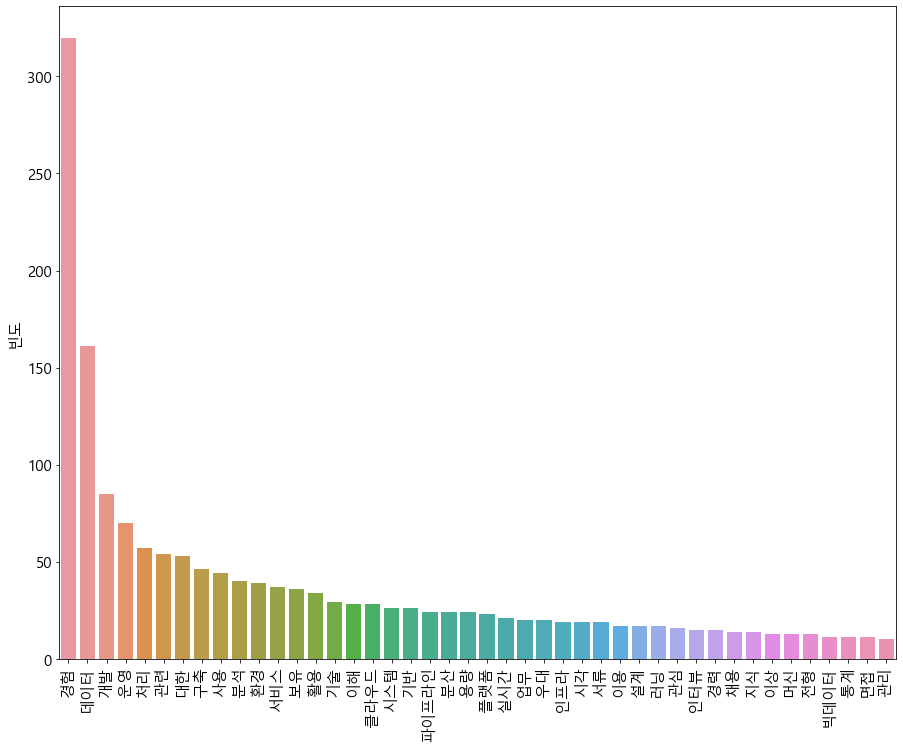

In [ ]:
plt.figure(figsize=(15,12))

sns.barplot(data = final_kor_df,x=final_kor_df.index, y=final_kor_df['빈도'])
plt.yticks(fontsize=15)
plt.xticks(fontsize=15, rotation=90)
plt.ylabel("빈도", fontsize=15)

plt.show()

In [ ]:
wordcloud_kor = WordCloud(
    font_path="c:/Windows/Fonts/malgun.ttf",
    background_color='white',
    width=500, height=500
).generate_from_frequencies(final_kor_df['빈도'])

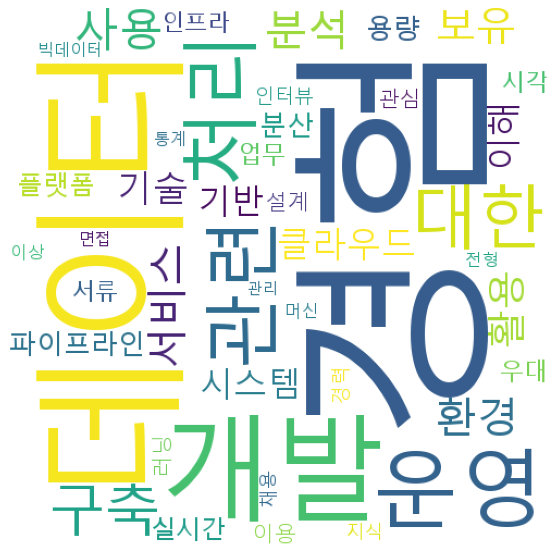

In [ ]:
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud_kor)
plt.axis('off') # 틱 안보이게 하기
plt.show()

# DS 자격요건

In [ ]:
wanted_ds_df = wanted_ds.copy()
wanted_ds_kor = wanted_ds['자격요건'].str.replace("[^가-힣\s]", "")
wanted_ds_df['자격요건_kor']=wanted_ds_kor


C:\Users\AMD3600\AppData\Local\Temp/ipykernel_5188/3277842978.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  wanted_ds_kor = wanted_ds['자격요건'].str.replace("[^가-힣\s]", "")


In [ ]:
wanted_ds_df = wanted_ds_df[wanted_ds_df['자격요건_kor'].apply(lambda x : re.sub('[^가-힣]', '', x)) != '' ]

In [ ]:
wanted_ds_eng = wanted_ds['자격요건'].str.replace("[^A-z\s]", "")
wanted_ds_df['자격요건_eng']=wanted_ds_eng

C:\Users\AMD3600\AppData\Local\Temp/ipykernel_5188/2674674547.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  wanted_ds_eng = wanted_ds['자격요건'].str.replace("[^A-z\s]", "")


In [ ]:
wanted_ds_df = wanted_ds_df[wanted_ds_df['자격요건_eng'].apply(lambda x : re.sub('[^A-z]', '', x)) != '' ]


In [ ]:
okt = Okt()

noun_kor = []
for row in wanted_ds_df["자격요건_kor"]:
    datas = okt.nouns(row)
    for data in datas:
        if len(data) >= 2:
            noun_kor.append(data)

print(noun_kor)

['대학교', '졸업', '이상', '컴퓨터', '공학', '수학', '통계학', '관련', '전공', '경력', '이상', '실무', '경력', '경험', '데이터', '능력', '통한', '처리', '시각', '구현', '회귀', '분류', '군집', '머신', '러닝', '알고리즘', '대한', '이해', '구현', '논리', '분석', '사고력', '경력', '경력', '이상', '면접', '결정', '통계', '분석', '프로그램', '활용', '데이터', '능력', '러닝머신', '러닝', '모델링', '활용', '언어', '도구', '하나', '이상', '활용', '러닝머신', '러닝', '대한', '기본', '지식', '보유', '엔지니어', '협업', '데이터', '분석', '파이프라인', '데이터', '기반', '서비스', '관련', '업무', '경험', '보유', '커뮤니케이션', '문서', '작성', '능력', '경력', '이상', '통계학', '컴퓨터공학', '유관', '전공', '학사', '이상', '머신', '러닝', '활용', '데이터', '분석', '모델링', '알고리즘', '개선', '업무', '경험', '조금', '생각', '자신', '능력', '발휘', '생각', '바로', '지원', '이상', '기반', '개발', '경력', '데이터', '모델링', '통해', '문제', '해결', '보신', '통계학', '빅데이터', '수학', '관련', '전공자', '지식', '대졸', '이상', '학력', '소지', '조금', '생각', '자신', '능력', '발휘', '생각', '바로', '지원', '이상', '실시간', '객체', '환경', '구축', '고도화', '경력', '활용', '개발', '경력', '이상', '필수', '라이브러리', '컴퓨터', '프레임워크', '대한', '이해도', '사용', '경험', '실시간', '러닝', '프레임워크', '기반', '대졸', '이상', '학력', '소지', '데이터', '분석', '

In [ ]:
count_kor = Counter(noun_kor)
words_dict_kor = dict(count_kor)

In [ ]:
words_kor_df = pd.DataFrame(words_dict_kor, index = [0])
words_kor_df = np.transpose(words_kor_df)
words_kor_df.head()

,0
대학교,1
졸업,2
이상,44
컴퓨터,5
공학,9


In [ ]:
words_kor_df['빈도'] = words_kor_df[words_kor_df[0] >= 10]
words_kor_df.sort_values(by='빈도',ascending=False)
words_kor_df

,0,빈도
대학교,1,NaN
졸업,2,NaN
이상,44,44.0
컴퓨터,5,NaN
공학,9,NaN
...,...,...
전체,4,NaN
사용자,2,NaN
사업,2,NaN
측면,2,NaN


In [ ]:
final_kor_df = words_kor_df.sort_values(by='빈도',ascending=False).dropna(0)
final_kor_df.head()

C:\Users\AMD3600\AppData\Local\Temp/ipykernel_5188/1426908650.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  final_kor_df = words_kor_df.sort_values(by='빈도',ascending=False).dropna(0)


,0,빈도
데이터,90,90.0
경험,54,54.0
분석,48,48.0
이상,44,44.0
관련,35,35.0


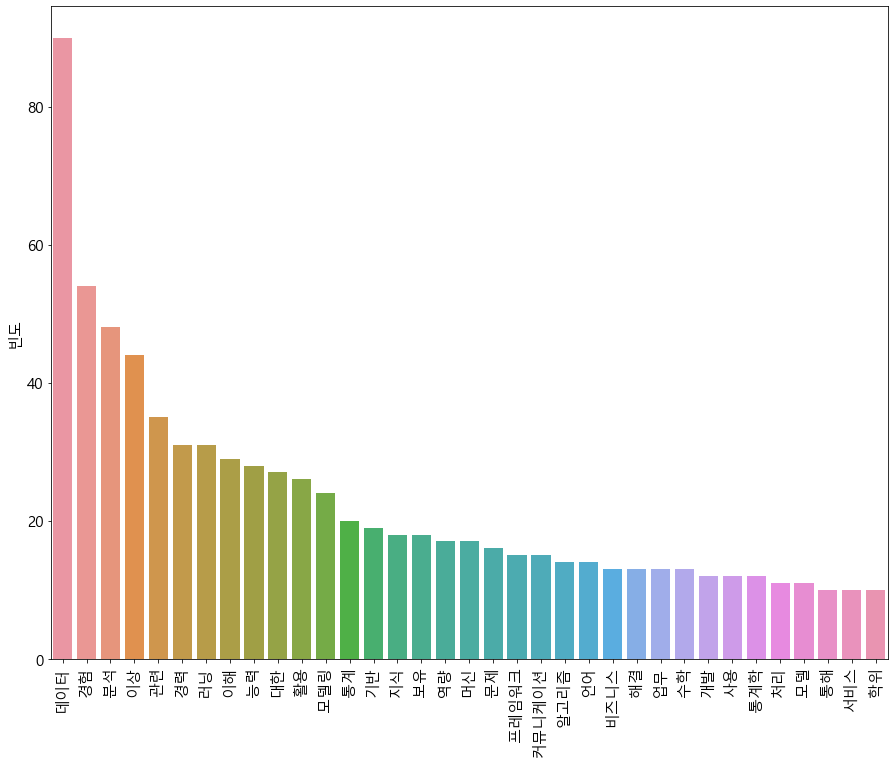

In [ ]:
plt.figure(figsize=(15,12))

sns.barplot(data = final_kor_df,x=final_kor_df.index, y=final_kor_df['빈도'])
plt.yticks(fontsize=15)
plt.xticks(fontsize=15, rotation=90)
plt.ylabel("빈도", fontsize=15)

plt.show()

In [ ]:
wordcloud_kor = WordCloud(
    font_path="c:/Windows/Fonts/malgun.ttf",
    background_color='white',
    width=500, height=500
).generate_from_frequencies(final_kor_df['빈도'])

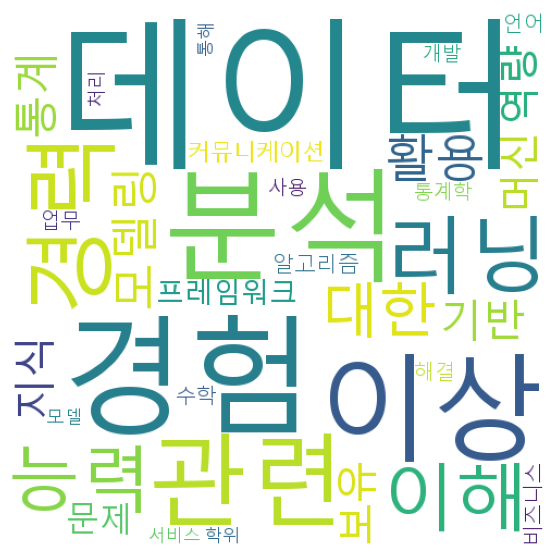

In [ ]:
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud_kor)
plt.axis('off') # 틱 안보이게 하기
plt.show()

# DS 우대사항

In [ ]:
wanted_ds_df = wanted_ds.copy()
wanted_ds_kor = wanted_ds['우대사항'].str.replace("[^가-힣\s]", "")
wanted_ds_df['우대사항_kor']=wanted_ds_kor

wanted_ds_df = wanted_ds_df[wanted_ds_df['우대사항_kor'].apply(lambda x : re.sub('[^가-힣]', '', x)) != '' ]

noun_kor = []
for row in wanted_ds_df["우대사항_kor"]:
    datas = okt.nouns(row)
    for data in datas:
        if len(data) >= 2:
            noun_kor.append(data)
            
count_kor = Counter(noun_kor)
words_dict_kor = dict(count_kor)

C:\Users\AMD3600\AppData\Local\Temp/ipykernel_5188/4028697158.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  wanted_ds_kor = wanted_ds['우대사항'].str.replace("[^가-힣\s]", "")


In [ ]:
words_kor_df = pd.DataFrame(words_dict_kor, index = [0])
words_kor_df = np.transpose(words_kor_df)
words_kor_df

,0
공학,10
계열,2
자연,1
사용,23
러닝,26
...,...
추론,1
협력,2
애자,2
블록,1


In [ ]:
words_kor_df['빈도'] = words_kor_df[words_kor_df[0] >= 10]
words_kor_df.sort_values(by='빈도',ascending=False)
words_kor_df

,0,빈도
공학,10,10.0
계열,2,NaN
자연,1,NaN
사용,23,23.0
러닝,26,26.0
...,...,...
추론,1,NaN
협력,2,NaN
애자,2,NaN
블록,1,NaN


In [ ]:
final_kor_df = words_kor_df.sort_values(by='빈도',ascending=False).dropna(0)

C:\Users\AMD3600\AppData\Local\Temp/ipykernel_5188/994511967.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  final_kor_df = words_kor_df.sort_values(by='빈도',ascending=False).dropna(0)


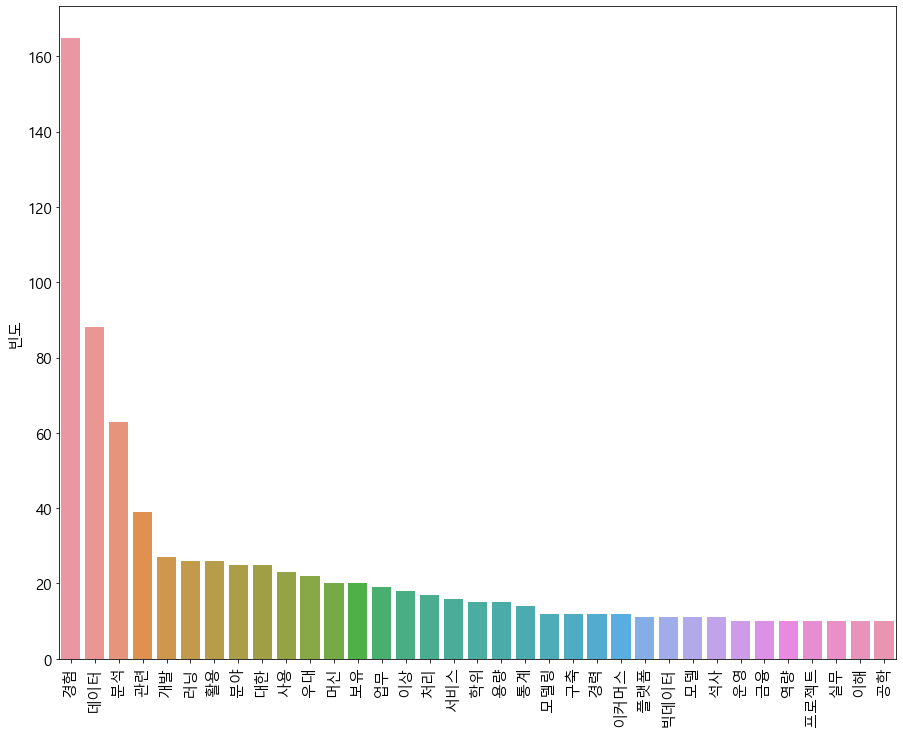

In [ ]:
plt.figure(figsize=(15,12))

sns.barplot(data = final_kor_df,x=final_kor_df.index, y=final_kor_df['빈도'])
plt.yticks(fontsize=15)
plt.xticks(fontsize=15, rotation=90)
plt.ylabel("빈도", fontsize=15)

plt.show()

In [ ]:
wordcloud_kor = WordCloud(
    font_path="c:/Windows/Fonts/malgun.ttf",
    background_color='white',
    width=500, height=500
).generate_from_frequencies(final_kor_df['빈도'])

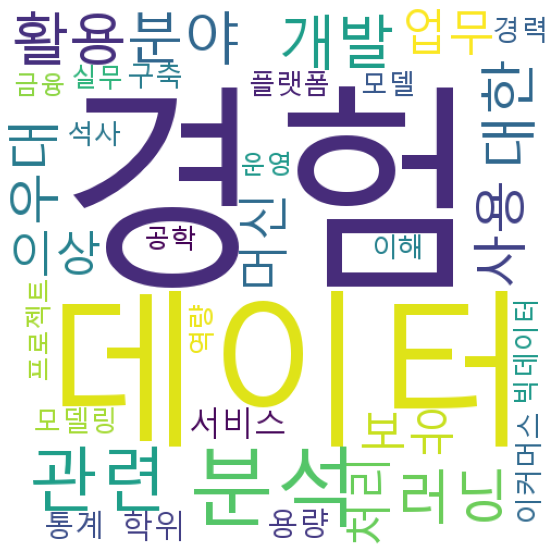

In [ ]:
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud_kor)
plt.axis('off') # 틱 안보이게 하기
plt.show()

# DA 자격요건

In [ ]:
wanted_da_df = wanted_da.copy()
wanted_da_kor = wanted_da['자격요건'].str.replace("[^가-힣\s]", "")
wanted_da_df['자격요건_kor']=wanted_da_kor

wanted_da_df = wanted_da_df[wanted_da_df['자격요건_kor'].apply(lambda x : re.sub('[^가-힣]', '', x)) != '' ]

noun_kor = []
for row in wanted_da_df["자격요건_kor"]:
    datas = okt.nouns(row)
    for data in datas:
        if len(data) >= 2:
            noun_kor.append(data)
            
count_kor = Counter(noun_kor)
words_dict_kor = dict(count_kor)

C:\Users\AMD3600\AppData\Local\Temp/ipykernel_5188/2741694176.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  wanted_da_kor = wanted_da['자격요건'].str.replace("[^가-힣\s]", "")


In [ ]:
words_kor_df = pd.DataFrame(words_dict_kor, index = [0])
words_kor_df = np.transpose(words_kor_df)
words_kor_df

,0
통계,30
산업,8
공학,4
인공,1
지능,1
...,...
시계열,1
예측,1
추천,3
빈도,1


In [ ]:
words_kor_df['빈도'] = words_kor_df[words_kor_df[0] >= 10]
words_kor_df.sort_values(by='빈도',ascending=False)
words_kor_df

,0,빈도
통계,30,30.0
산업,8,NaN
공학,4,NaN
인공,1,NaN
지능,1,NaN
...,...,...
시계열,1,NaN
예측,1,NaN
추천,3,NaN
빈도,1,NaN


In [ ]:
final_kor_df = words_kor_df.sort_values(by='빈도',ascending=False).dropna(0)

C:\Users\AMD3600\AppData\Local\Temp/ipykernel_5188/994511967.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  final_kor_df = words_kor_df.sort_values(by='빈도',ascending=False).dropna(0)


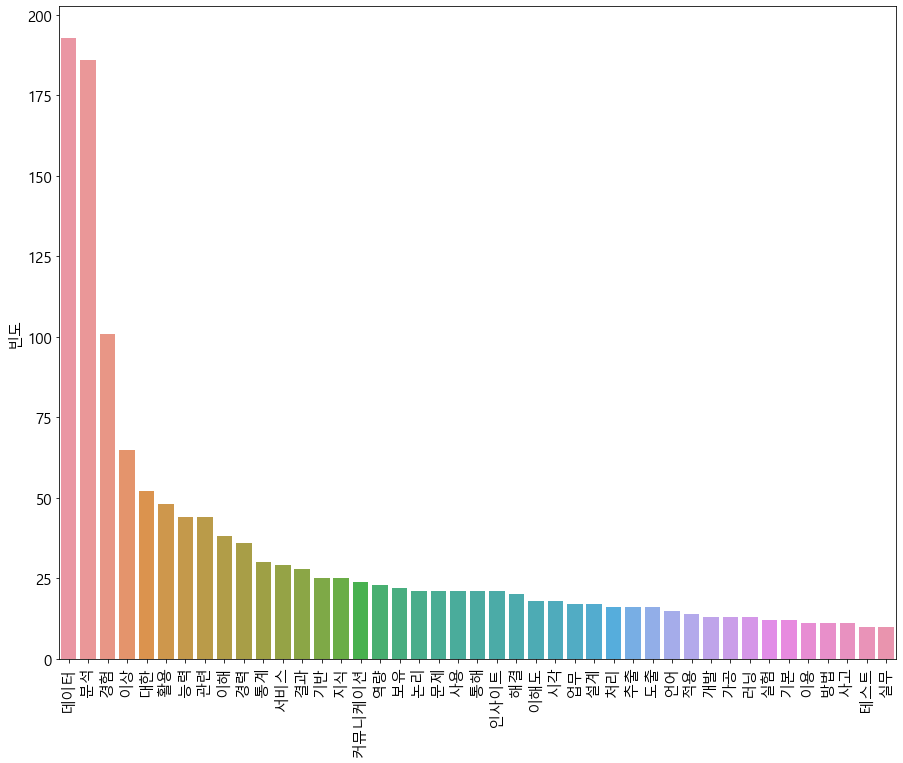

In [ ]:
plt.figure(figsize=(15,12))

sns.barplot(data = final_kor_df,x=final_kor_df.index, y=final_kor_df['빈도'])
plt.yticks(fontsize=15)
plt.xticks(fontsize=15, rotation=90)
plt.ylabel("빈도", fontsize=15)

plt.show()

In [ ]:
wordcloud_kor = WordCloud(
    font_path="c:/Windows/Fonts/malgun.ttf",
    background_color='white',
    width=500, height=500
).generate_from_frequencies(final_kor_df['빈도'])

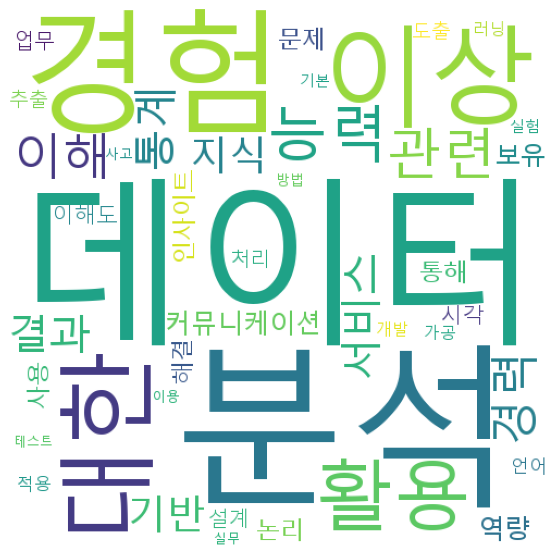

In [ ]:
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud_kor)
plt.axis('off') # 틱 안보이게 하기
plt.show()

# DA 우대사항

In [ ]:
wanted_da_df = wanted_da.copy()
wanted_da_kor = wanted_da['우대사항'].str.replace("[^가-힣\s]", "")
wanted_da_df['우대사항_kor']=wanted_da_kor

wanted_da_df = wanted_da_df[wanted_da_df['우대사항_kor'].apply(lambda x : re.sub('[^가-힣]', '', x)) != '' ]

noun_kor = []
for row in wanted_da_df["우대사항_kor"]:
    datas = okt.nouns(row)
    for data in datas:
        if len(data) >= 2:
            noun_kor.append(data)
            
count_kor = Counter(noun_kor)
words_dict_kor = dict(count_kor)

C:\Users\AMD3600\AppData\Local\Temp/ipykernel_5188/1487778096.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  wanted_da_kor = wanted_da['우대사항'].str.replace("[^가-힣\s]", "")


In [ ]:
words_kor_df = pd.DataFrame(words_dict_kor, index = [0])
words_kor_df = np.transpose(words_kor_df)

words_kor_df['빈도'] = words_kor_df[words_kor_df[0] >= 10]
words_kor_df.sort_values(by='빈도',ascending=False)

final_kor_df = words_kor_df.sort_values(by='빈도',ascending=False).dropna(0)

C:\Users\AMD3600\AppData\Local\Temp/ipykernel_5188/1748226774.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  final_kor_df = words_kor_df.sort_values(by='빈도',ascending=False).dropna(0)


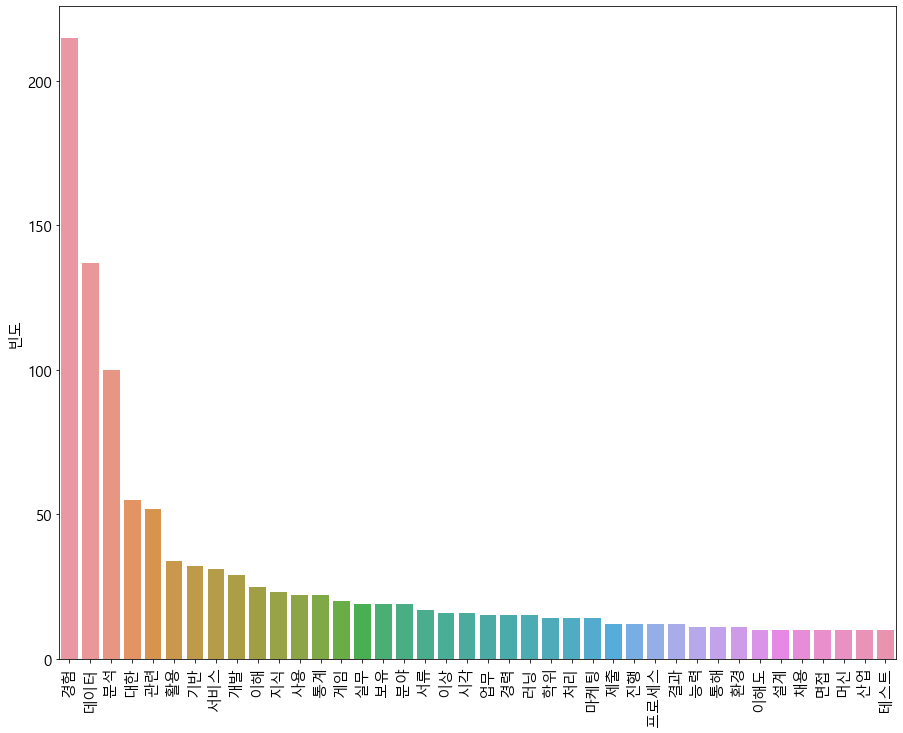

In [ ]:
plt.figure(figsize=(15,12))

sns.barplot(data = final_kor_df,x=final_kor_df.index, y=final_kor_df['빈도'])
plt.yticks(fontsize=15)
plt.xticks(fontsize=15, rotation=90)
plt.ylabel("빈도", fontsize=15)

plt.show()

In [ ]:
wordcloud_kor = WordCloud(
    font_path="c:/Windows/Fonts/malgun.ttf",
    background_color='white',
    width=500, height=500
).generate_from_frequencies(final_kor_df['빈도'])

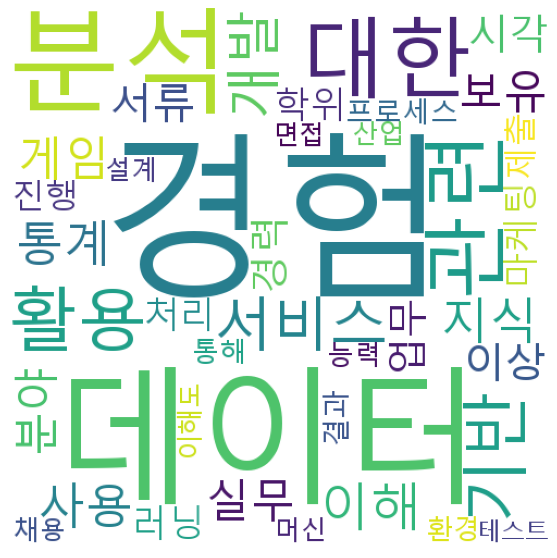

In [ ]:
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud_kor)
plt.axis('off') # 틱 안보이게 하기
plt.show()